# ML Challenge 

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps: 
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [167]:
# You may include any package you deem fit. We sugggest looking into Scikit-learn
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset


In [168]:
# DO NOT MODIFY
loan_data = pd.read_csv("../../data/loan_approval.csv")


## EDA
Uncomment to see desired output. Add more analysis if you like

In [169]:
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')
           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    

/var/folders/jy/j8xvywpn7mz4ylrqrpy4_1fm0000gn/T/ipykernel_96629/483029147.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = loan_data.corr()


([<matplotlib.axis.YTick at 0x31f82b9d0>,
 [Text(0, 0, 'loan_id'),
  Text(0, 1, 'no_of_dependents'),
  Text(0, 2, 'income_annum'),
  Text(0, 3, 'loan_amount'),
  Text(0, 4, 'loan_term'),
  Text(0, 5, 'cibil_score'),
  Text(0, 6, 'residential_assets_value'),
  Text(0, 7, 'commercial_assets_value'),
  Text(0, 8, 'luxury_assets_value'),
  Text(0, 9, 'bank_asset_value')])

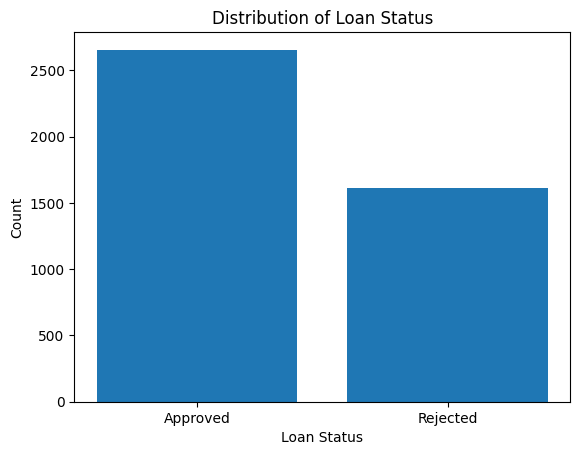

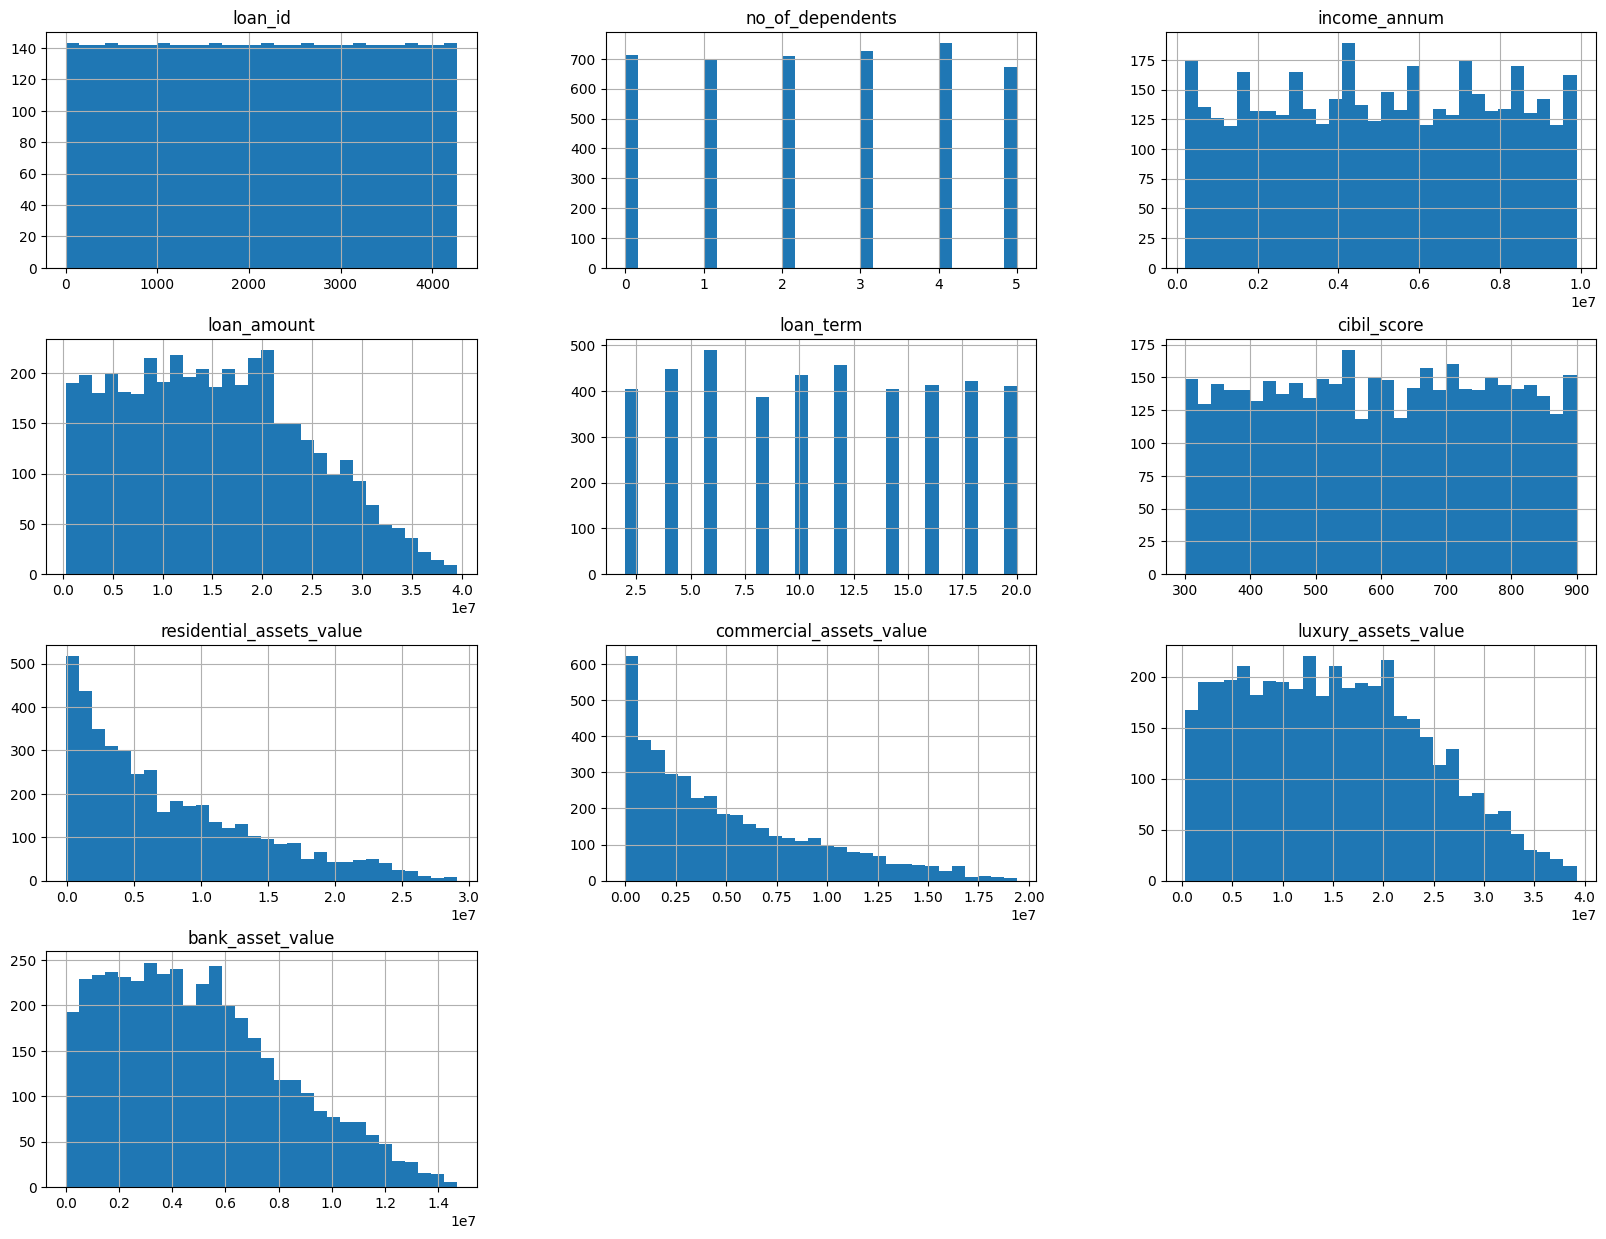

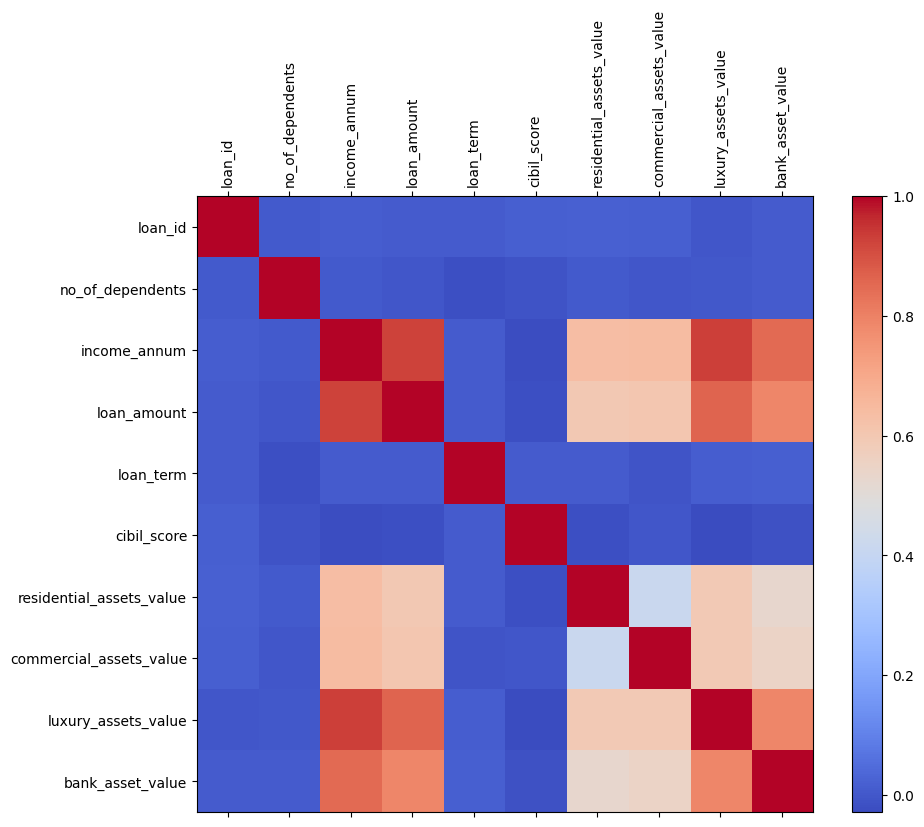

In [170]:

import matplotlib.pyplot as plt

# ------ Display basic information ------
print(loan_data.columns)
print(loan_data.describe())

# ------ Check for missing values ------
print(loan_data.isnull().sum()) # no missing values

# ------ Visualize the distribution of loan status ------
loan_status_counts = loan_data['loan_status'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# ------ Visualize the distribution of numerical features ------ 
loan_data.hist(bins=30, figsize=(20, 15))

# ------ Correlation matrix ------
corr_matrix = loan_data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# ----- MORE (Encouraged but not required) ------
# TODO 


/var/folders/jy/j8xvywpn7mz4ylrqrpy4_1fm0000gn/T/ipykernel_96629/4267809422.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jy/j8xvywpn7mz4ylrqrpy4_1fm0000gn/T/ipykernel_96629/4267809422.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jy/j8xvywpn7mz4ylrqrpy4_1fm0000gn/T/ipykernel_96629/4267809422.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jy/j8xvywpn7mz4ylrqrpy4_1fm0000gn/T/ipykernel_96629/4267809422.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jy/j8xvywpn7mz4ylrqrpy4_1fm0000gn/T/ipykernel_96629/4267809422.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jy/j8xvywpn7mz4ylrqrpy4_1fm0000gn/T/ipykernel_96629/4267809422.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jy/j8xvywpn7mz4ylrqrpy4_1fm0000gn/T/ipykernel_96629

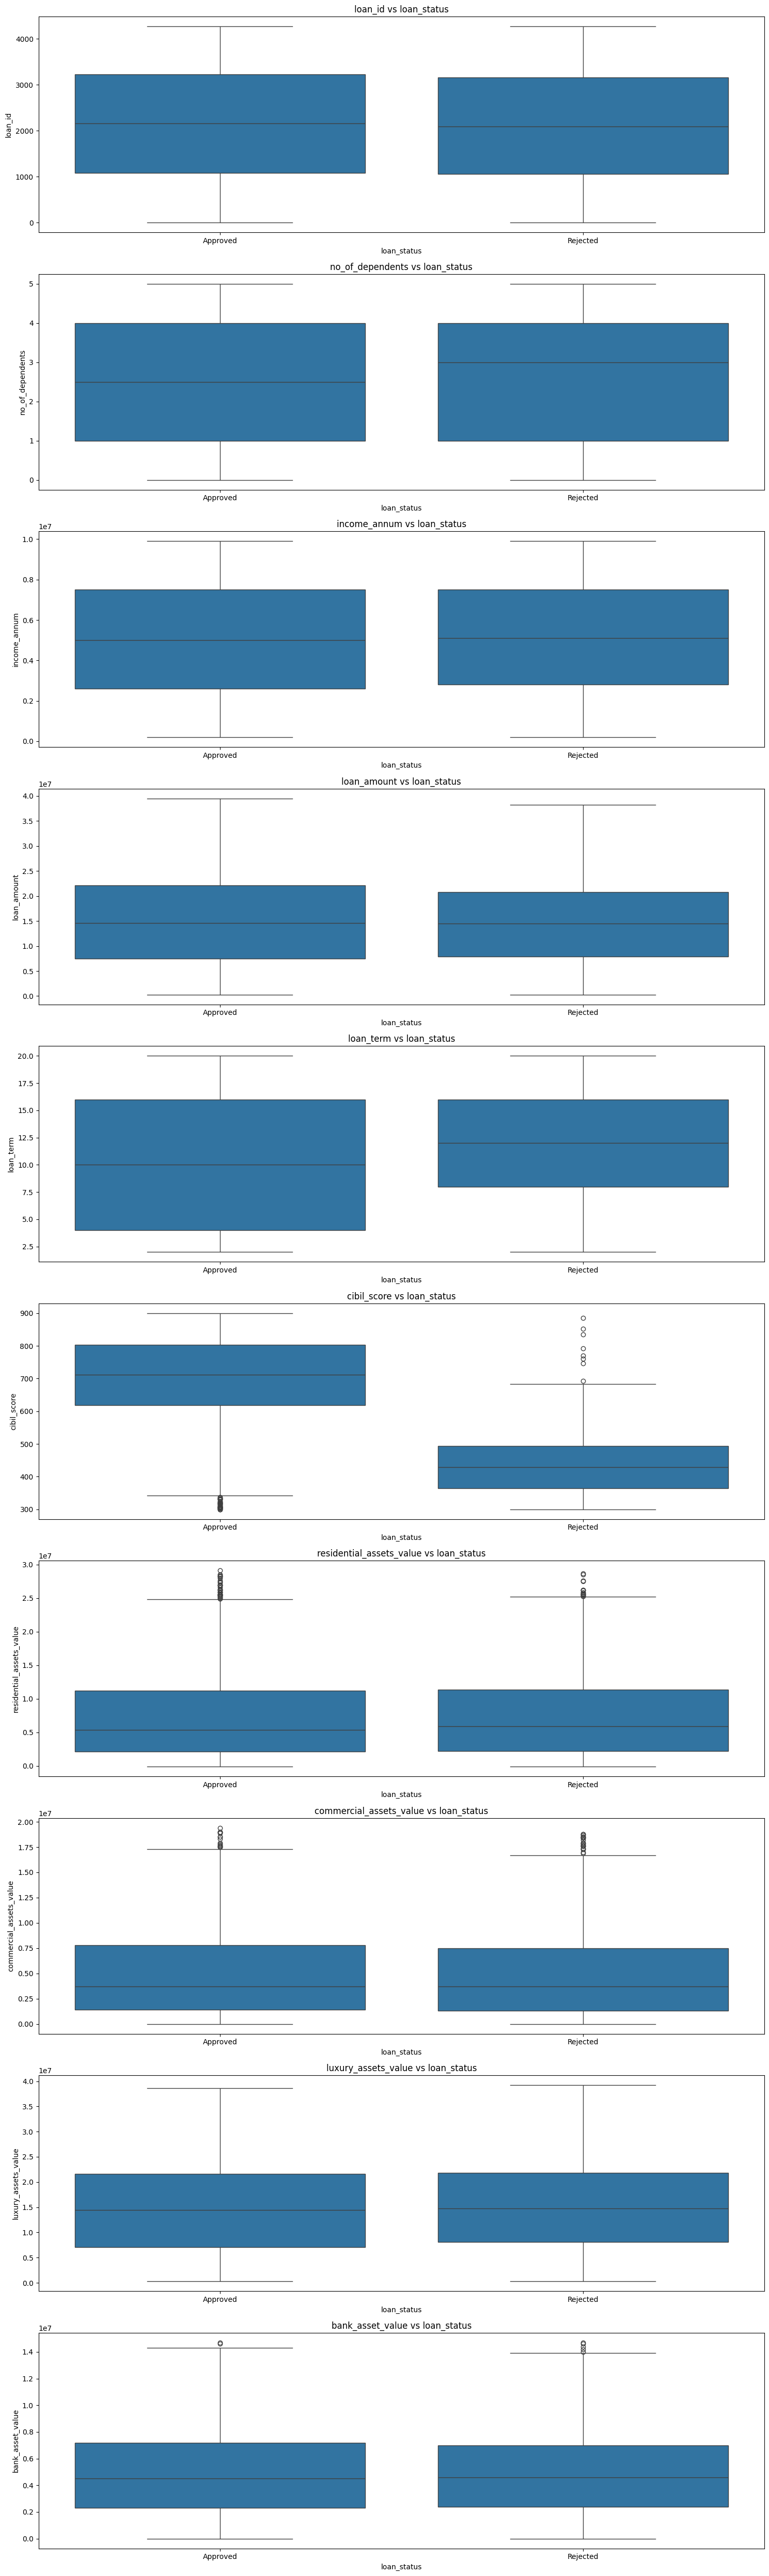

In [171]:
# ------ Boxplots ------
# Interaction between Quantitative vars and loan_status
target = 'loan_status'

# Get numerical columns
numerical_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns

# Plot all numerical columns against the target
plt.figure(figsize=(15, 5 * len(numerical_columns)))

# ignore loan_id
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=target, y=column, data=loan_data)
    plt.title(f'{column} vs {target}')
    plt.tight_layout()

plt.show() # seems like cibil score makes the biggest difference
# ignore loan_id

## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

In [172]:
loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0})
# Hint: Other categorical variables are self_employed and loan_status
# TODO
print(loan_data['self_employed'].unique()) # two categories
print(loan_data['loan_status'].unique()) # two categories
loan_data['self_employed'] = loan_data['self_employed'].map({'No': 1, 'Yes': 0})
loan_data['loan_status'] = loan_data['loan_status'].map({'Approved': 1, 'Rejected': 0})




['No' 'Yes']
['Approved' 'Rejected']


In [173]:
# add a total asset value column
loan_data['total_assets_value'] = loan_data['residential_assets_value'] + loan_data['commercial_assets_value'] + loan_data['luxury_assets_value'] + loan_data['bank_asset_value']
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets_value
0,1,2,1,1,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,50700000
1,2,0,0,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,17000000
2,3,3,1,1,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,57700000
3,4,3,1,1,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,52700000
4,5,5,0,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,55000000


## Model Selection

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ... 

In [174]:
# TODO
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Model Training and Evaluation

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# seperate prediction variables and target
X = loan_data[['no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'total_assets_value']]
y = loan_data['loan_status']

# seperate train+validation and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
logreg = LogisticRegression()

# 5-fold cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')  
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.62079063 0.61786237 0.61786237 0.72620791 0.62079063]
Mean CV Accuracy: 0.6407027818448023


## Model Optimization and Testing

In [176]:
# Try scaling X because money related columns are on a much largers scale than the other numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# seperate train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# model
logreg = LogisticRegression()

# 5-fold cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')  
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.90629575 0.91068814 0.93118594 0.91508053 0.92972182]
Mean CV Accuracy: 0.9185944363103953


In [177]:
# Try hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for optimization
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # Regularization strength
    'penalty': ['l2', 'l1'],             # Penalty type (l1, l2); liblinear solver supports both
    'solver': ['liblinear'],             # Solver choice for l1 and l2 penalty
    'max_iter': [100, 200, 500]          # Maximum number of iterations
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.9402635431918009


In [178]:
# tuned logistic regression model
best_logreg = grid_search.best_estimator_

# Train the model on the entire training set
best_logreg.fit(X_train, y_train)

# predictions
y_pred = best_logreg.predict(X_test)


# Model's performance on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Set Accuracy: 0.9344262295081968
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       318
           1       0.97      0.92      0.95       536

    accuracy                           0.93       854
   macro avg       0.93      0.94      0.93       854
weighted avg       0.94      0.93      0.93       854



Scaling the training features makes a big difference. Hyperparameter tuning made a minor improvement.